   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 1.7 MB/s eta 0:00:00
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


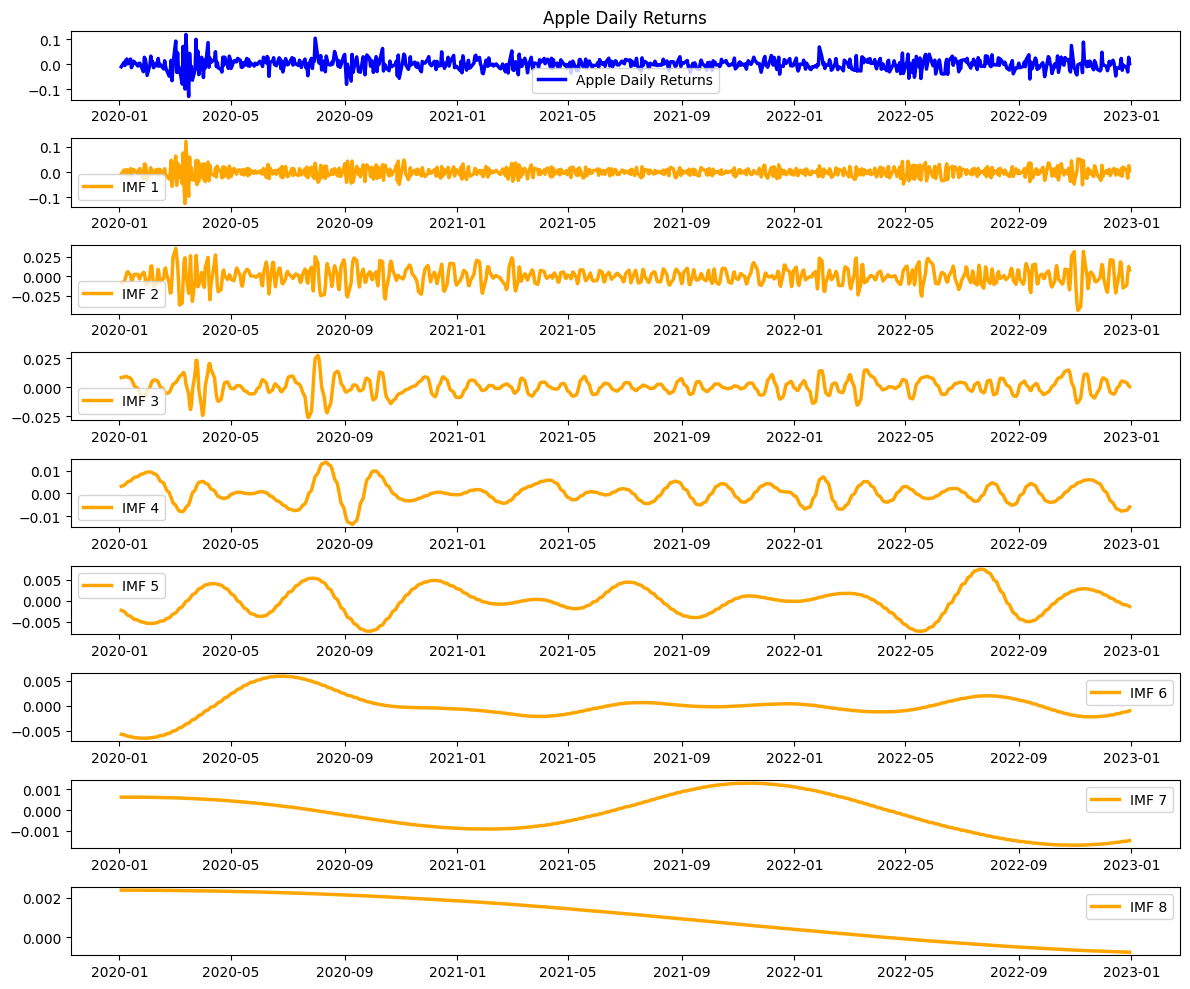

In [1]:
!pip install EMD-signal
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from PyEMD import EMD

# Fetch Apple stock data from Yahoo Finance
def fetch_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Calculate daily returns and drop NaNs
def calculate_returns(stock_data):
    stock_data['Daily Return'] = stock_data['Close'].pct_change()  # This introduces NaN in the first row
    return stock_data['Daily Return'].dropna()

# Perform EMD on the returns
def perform_emd(returns):
    emd = EMD()
    IMFs = emd(returns.values)
    return IMFs

# Plot the results
def plot_results(returns, IMFs):
    fig, axes = plt.subplots(len(IMFs) + 1, 1, figsize=(12, 10), facecolor='none')  # Transparent figure

    # Set transparent background for all subplots
    for ax in axes:
        ax.set_facecolor('none')  # Transparent background for each subplot

    # Plot the original returns
    axes[0].plot(returns.index, returns, label='Apple Daily Returns', color='blue', linewidth=2.5)
    axes[0].legend()
    axes[0].set_title('Apple Daily Returns')

    # Plot each IMF
    for i, imf in enumerate(IMFs):
        axes[i + 1].plot(returns.index[:len(imf)], imf, label=f'IMF {i + 1}', color='orange', linewidth=2.5)
        axes[i + 1].legend()

    plt.tight_layout()

    # Save the plot with a fully transparent background
    plt.savefig('AAPL_EMD_plot.png', transparent=True, bbox_inches='tight', dpi=300)

    # Show the plot
    plt.show()

# Main script
if __name__ == "__main__":
    # Define parameters
    ticker = 'AAPL'  # Apple stock ticker
    start_date = '2020-01-01'
    end_date = '2023-01-01'

    # Fetch stock data
    stock_data = fetch_stock_data(ticker, start_date, end_date)

    # Calculate daily returns
    returns = calculate_returns(stock_data)

    # Perform EMD
    IMFs = perform_emd(returns)

    # Plot the results
    plot_results(returns, IMFs)